<a href="https://colab.research.google.com/github/Jaimish0513/24110091_sem2/blob/main/AI_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report


# setup values
RANDOM_STATE = 7
NUM_EPOCHS = 15
BS = 128
LR = 1e-3

# keeping exactly six hidden layers
DENSE_STRUCTURE = (256, 256, 128, 128, 64, 64)

np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)


In [2]:
# loading mnist
(train_imgs, train_labels), (test_imgs, test_labels) = tf.keras.datasets.mnist.load_data()

print("dataset loaded")
print(train_imgs.shape, train_labels.shape)
print(test_imgs.shape, test_labels.shape)


dataset loaded
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# preprocessing data
train_imgs = train_imgs.astype("float32") / 255.0
test_imgs = test_imgs.astype("float32") / 255.0

train_vec = train_imgs.reshape(-1, 784)
test_vec = test_imgs.reshape(-1, 784)

train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)


In [4]:
#plotting utilities
def showing_plot():
    plt.show(block=True)
    plt.pause(0.1)
    plt.close()


def history_plotter(hist_obj, title_text):
    history_data = hist_obj.history

    plt.figure()
    plt.plot(history_data["accuracy"], color="purple", label="train acc")
    plt.plot(history_data["val_accuracy"], color="orange", label="val acc")
    plt.title(f"{title_text} accuracy")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    showing_plot()

    plt.figure()
    plt.plot(history_data["loss"], color="green", label="train loss")
    plt.plot(history_data["val_loss"], color="red", label="val loss")
    plt.title(f"{title_text} loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
    showing_plot()


def confusion_plot(cm_data, title_text):
    plt.figure(figsize=(7,6))
    plt.imshow(cm_data, cmap="plasma", interpolation="nearest")
    plt.colorbar()
    plt.title(title_text)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.xticks(range(10))
    plt.yticks(range(10))
    plt.tight_layout()
    showing_plot()


def display_samples(xdata, ytrue, ypred, title_text, count=16):
    count = max(1, min(count, len(xdata)))
    chosen = np.random.choice(len(xdata), count, replace=False)

    cols = 4
    rows = int(np.ceil(count/cols))

    plt.figure(figsize=(10,8))
    for i, idx in enumerate(chosen, start=1):
        plt.subplot(rows, cols, i)
        plt.imshow(xdata[idx].reshape(28,28), cmap="gray")
        plt.title(f"T:{ytrue[idx]} P:{ypred[idx]}")
        plt.axis("off")

    plt.suptitle(title_text)
    plt.tight_layout()
    showing_plot()


In [5]:
#building the model
def create_network(act_function):

    if len(DENSE_STRUCTURE) != 6:
        raise ValueError("need exactly six hidden layers")

    net = models.Sequential(name=f"model_{act_function}")

    net.add(layers.Input(shape=(784,)))

    for layer_id, neurons in enumerate(DENSE_STRUCTURE):
        net.add(layers.Dense(neurons, activation=act_function))

    net.add(layers.Dense(10, activation="softmax"))

    net.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return net


In [6]:
#training and evaluating this function
def run_experiment(act_function):

    net = create_network(act_function)

    print("\n" + "="*70)
    print("running experiment with:", act_function)
    net.summary()

    stop_callback = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            patience=3,
            restore_best_weights=True
        )
    ]

    history = net.fit(
        train_vec,
        train_labels_cat,
        validation_split=0.1,
        epochs=NUM_EPOCHS,
        batch_size=BS,
        verbose=1,
        callbacks=stop_callback
    )

    test_loss, test_acc = net.evaluate(test_vec, test_labels_cat, verbose=0)

    predictions_prob = net.predict(test_vec, verbose=0)
    predicted_labels = np.argmax(predictions_prob, axis=1)

    print("\nresults for", act_function)
    print("loss:", test_loss)
    print("accuracy:", test_acc)

    print("\nclassification report")
    print(classification_report(test_labels, predicted_labels, digits=4))

    history_plotter(history, act_function)
    cm = confusion_matrix(test_labels, predicted_labels)
    confusion_plot(cm, f"confusion matrix {act_function}")

    display_samples(
        test_vec,
        test_labels,
        predicted_labels,
        f"samples using {act_function}",
        16
    )

    return test_loss, test_acc



running experiment with: tanh


Model: "model_tanh"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329,226 (1.26 MB)

 Trainable params: 329,226 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8578 - loss: 0.4983 - val_accuracy: 0.9637 - val_loss: 0.1358
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9574 - loss: 0.1478 - val_accuracy: 0.9717 - val_loss: 0.1068
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9697 - loss: 0.1037 - val_accuracy: 0.9712 - val_loss: 0.0975
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9764 - loss: 0.0791 - val_accuracy: 0.9678 - val_loss: 0.1011
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9816 - loss: 0.0621 - val_accuracy: 0.9703 - val_loss: 0.1068
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9846 - loss: 0.0504 - val_accuracy: 0.9668 - val_loss: 0.1168

results for tanh
loss: 0.12202467024326324
accuracy: 0.9635000228881836

classification report
              precision    recall  f1-score   support

           0     0.9557    0.9908    0.9729       980
           1     0.96

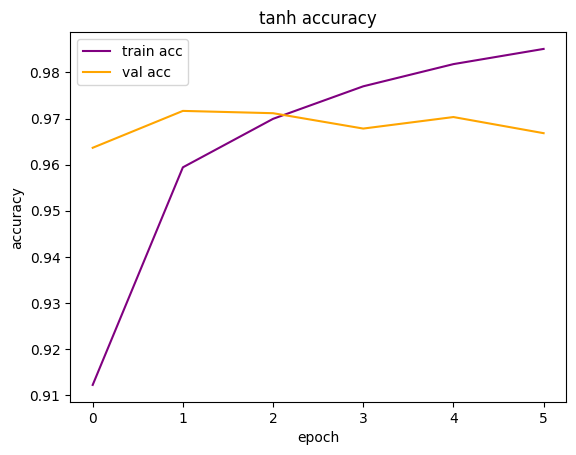

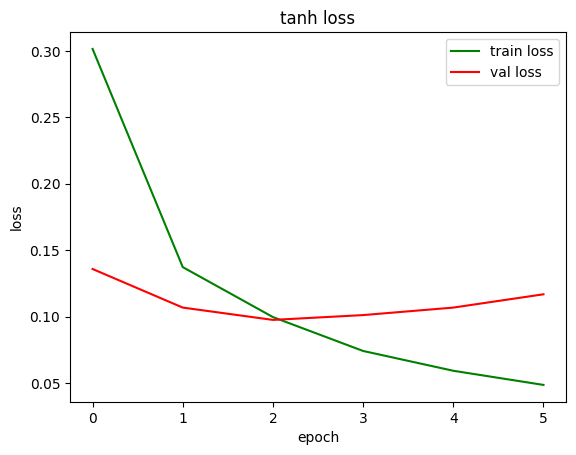

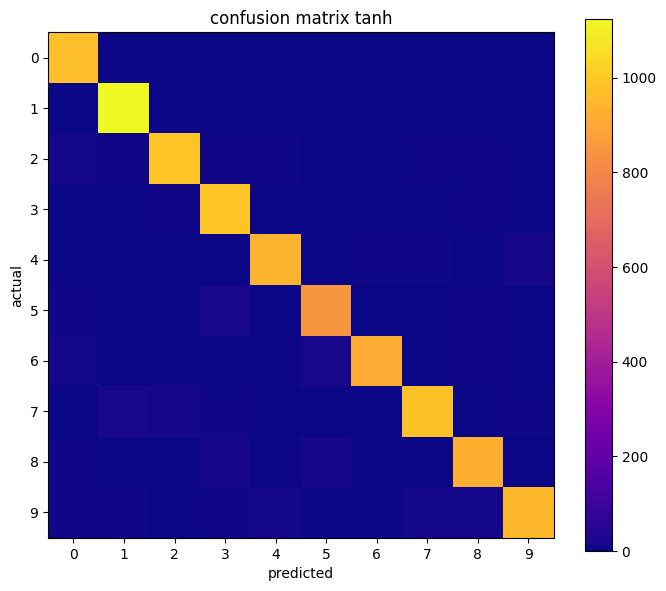

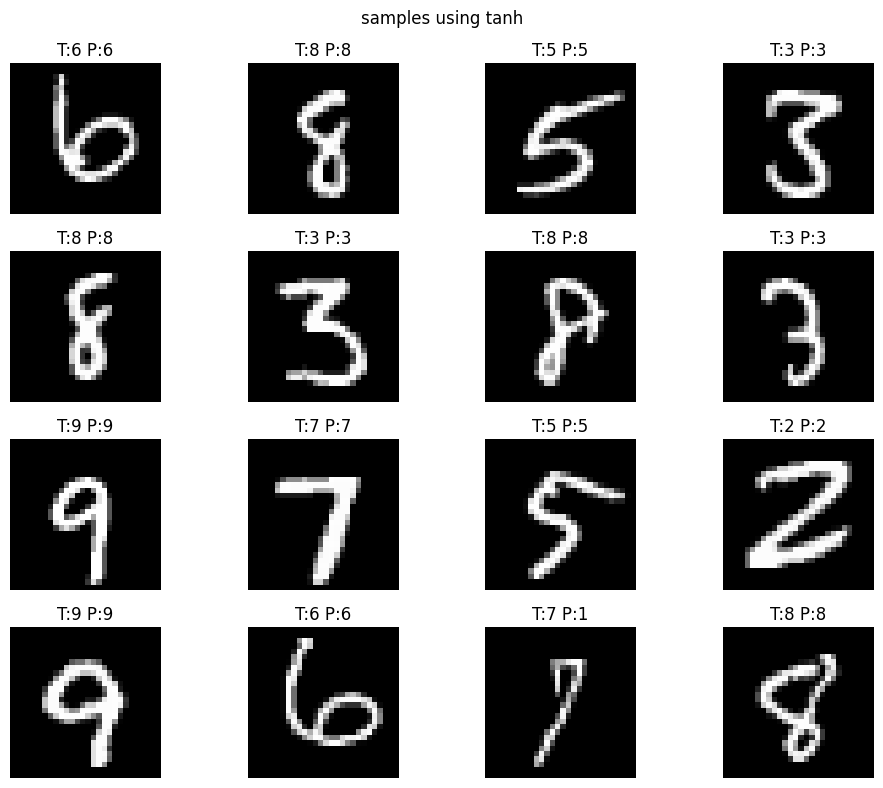


running experiment with: sigmoid


Model: "model_sigmoid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329,226 (1.26 MB)

 Trainable params: 329,226 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2698 - loss: 1.9548 - val_accuracy: 0.7638 - val_loss: 0.8152
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7975 - loss: 0.7190 - val_accuracy: 0.9198 - val_loss: 0.3370
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9126 - loss: 0.3533 - val_accuracy: 0.9470 - val_loss: 0.2131
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9397 - loss: 0.2418 - val_accuracy: 0.9560 - val_loss: 0.1747
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9528 - loss: 0.1896 - val_accuracy: 0.9565 - val_loss: 0.1648
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9608 - loss: 0.1565 - val_accuracy: 0.9543 - val_loss: 0.1725
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9653 - loss: 0.1358 - val_accuracy: 0.9637 - val_loss: 0.1451
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9708 - loss: 0.1152 - val_accu

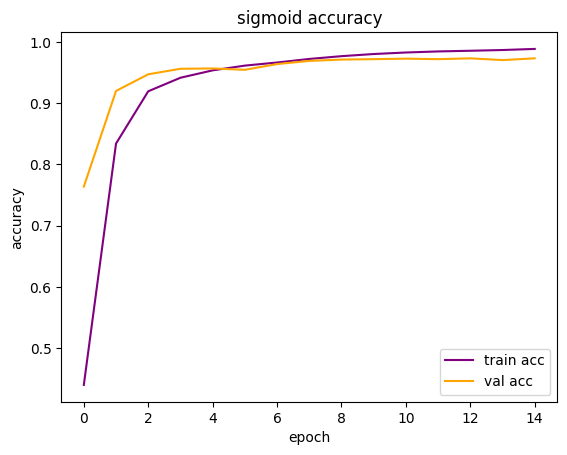

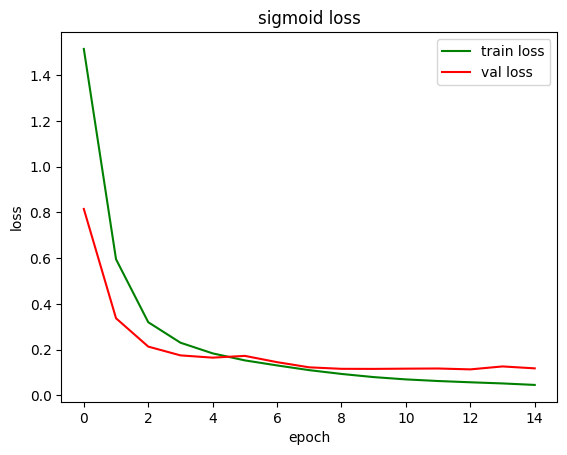

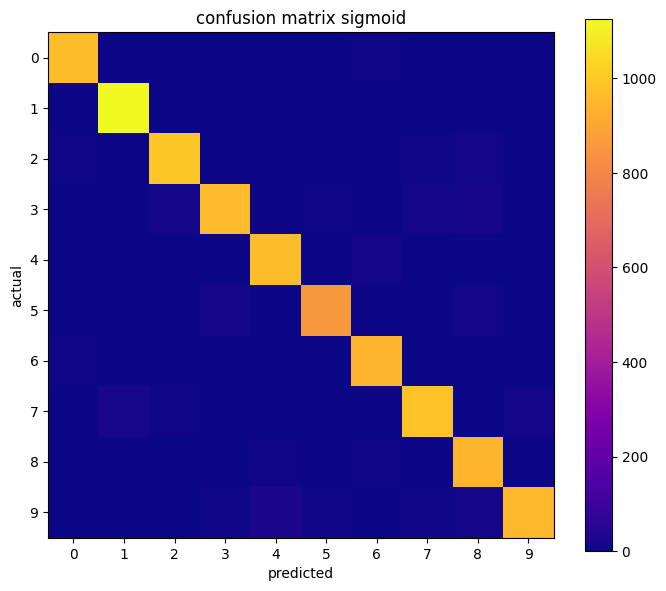

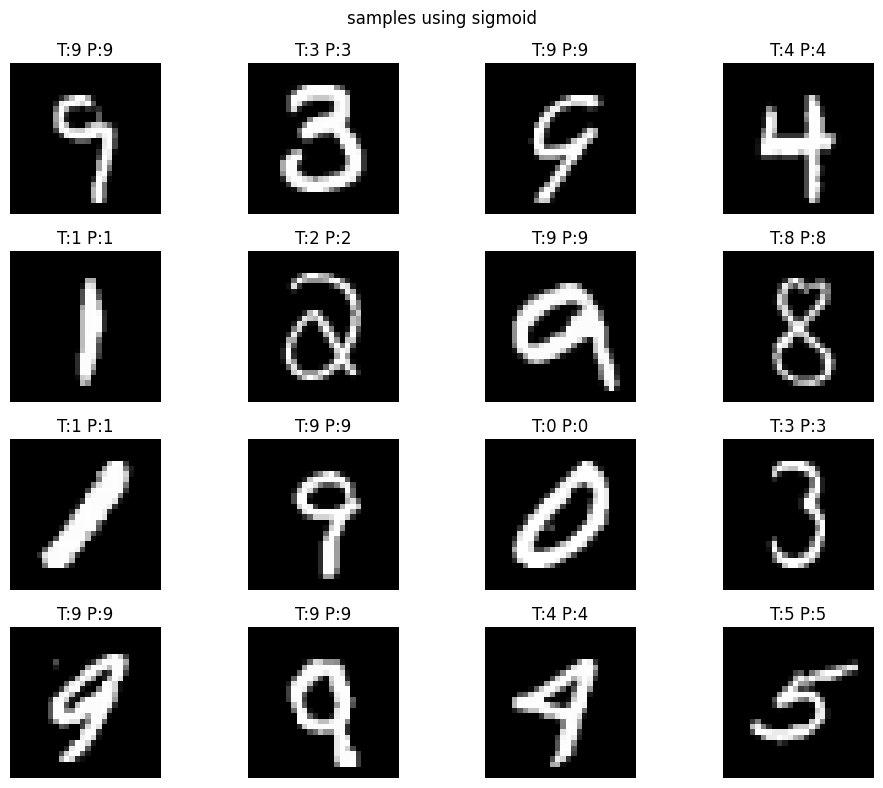


final comparison
tanh: 0.12202467024326324 0.9635000228881836
sigmoid: 0.12746699154376984 0.9689000248908997


In [7]:
# running experiments with comparing both functions
tanh_loss, tanh_acc = run_experiment("tanh")
sig_loss, sig_acc = run_experiment("sigmoid")

print("\nfinal comparison")
print("tanh:", tanh_loss, tanh_acc)
print("sigmoid:", sig_loss, sig_acc)
